In [1]:
#importing Libraries 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc


import time
import datetime
from fbprophet import Prophet 

In [2]:
#importing the dataset
bh = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]

In [3]:
bh.head(5)

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Aug 12, 2018",6283.65,6409.85,6237.50,6322.69,5665250000,108106451582
1,"Aug 11, 2018",6185.79,6455.74,6109.03,6295.73,4047850000,106409456302
2,"Aug 10, 2018",6571.42,6591.26,6124.52,6184.71,4528680000,113028788092
3,"Aug 09, 2018",6305.56,6625.73,6249.07,6568.23,4267040000,108444366975
4,"Aug 08, 2018",6746.85,6746.85,6226.22,6305.80,5064430000,116020470612


In [4]:
type(bh)

pandas.core.frame.DataFrame

In [6]:
#viewing data types
bh.dtypes

Date           object
Open*         float64
High          float64
Low           float64
Close**       float64
Volume         object
Market Cap      int64
dtype: object

In [7]:
#converting necessary datat types
bh['Date'] = pd.to_datetime(bh['Date'])

In [8]:
bh.dtypes

Date          datetime64[ns]
Open*                float64
High                 float64
Low                  float64
Close**              float64
Volume                object
Market Cap             int64
dtype: object

In [9]:
# The prophet expects to be a ds column  that contains the datetime field
#and a y column that contains the value we are wanting to forecast.
bh = bh.rename(columns={'Date': 'ds', 'Close**': 'y'})

In [10]:
bh.tail(5)

,ds,Open*,High,Low,y,Volume,Market Cap
1928,2013-05-02,116.38,125.60,92.28,105.21,-,1292189952
1929,2013-05-01,139.00,139.89,107.72,116.99,-,1542819968
1930,2013-04-30,144.00,146.93,134.05,139.00,-,1597779968
1931,2013-04-29,134.44,147.49,134.00,144.54,-,1491160064
1932,2013-04-28,135.30,135.98,132.10,134.21,-,1500519936


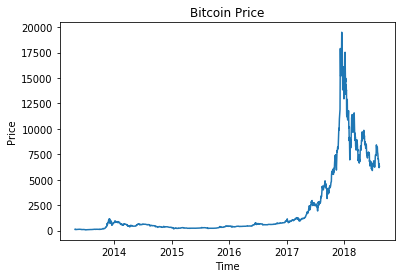

In [12]:
#Visualizing given data
plt.plot(bh['ds'], bh['y'])
plt.title('Bitcoin Price')
plt.ylabel('Price');
plt.xlabel('Time');
plt.show()

In [13]:
#Creating and fitting Model to data 
model = Prophet(interval_width=0.95)
model.fit(bh)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jashw\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [14]:
#Creating future dates to predict(for 3 years or 36 months)
future_dates = model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
1964,2021-04-01
1965,2021-05-01
1966,2021-06-01
1967,2021-07-01
1968,2021-08-01


In [15]:
#Forcasting Future Dates
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1964,2021-04-01,24526.779854,14875.601084,34893.371695
1965,2021-05-01,25195.646401,15032.063964,36064.171599
1966,2021-06-01,25276.227753,14695.051436,36187.635747
1967,2021-07-01,25295.364410,14044.667691,36261.194410
1968,2021-08-01,25827.573034,14236.335281,37496.515206


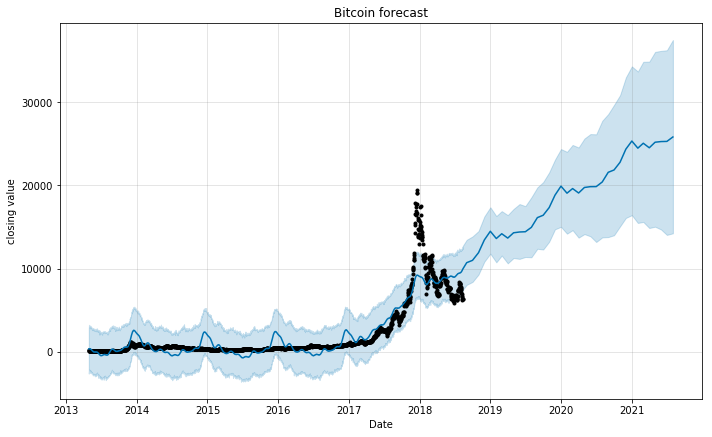

In [16]:
model.plot(forecast, xlabel = 'Date', ylabel = 'closing value', uncertainty=True)
plt.title('Bitcoin forecast')
plt.show();

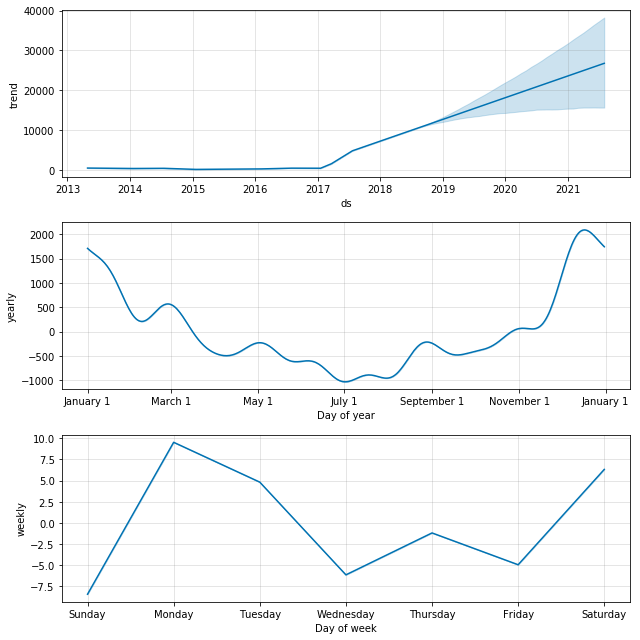

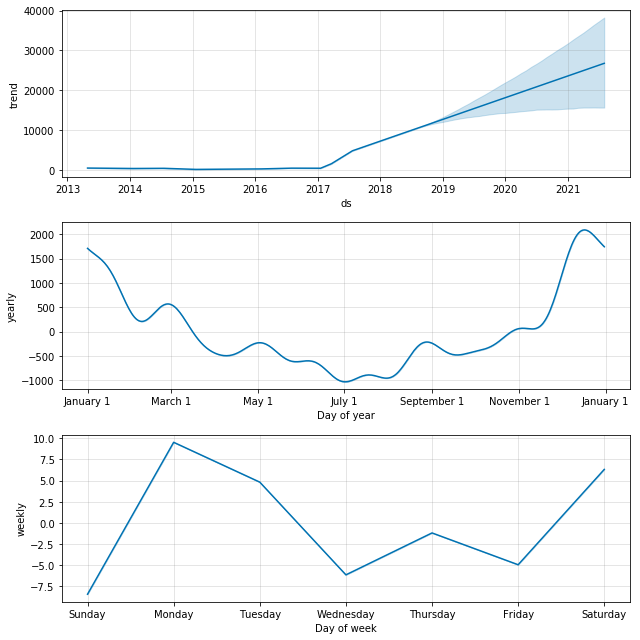

In [17]:
#Visualization in difftent time series
model.plot_components(forecast)

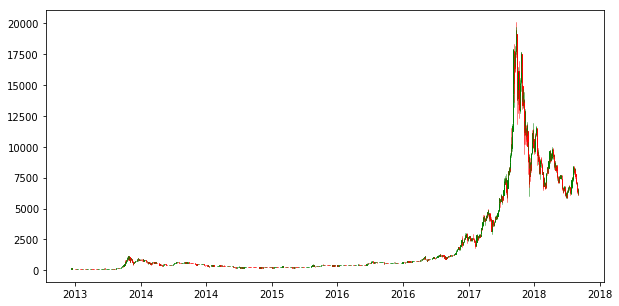

In [18]:
#Candelstick Open High Low Close (OHLC graph) for stock visualization 
import matplotlib.dates as mdates
bh["ds"] = bh["ds"].apply(mdates.date2num)

ohlc= bh[['ds', 'Open*', 'High', 'Low','y']].copy()
f1, ax = plt.subplots(figsize = (10,5))
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))